In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
csv = pd.read_csv('https://raw.githubusercontent.com/aviadr1/learn-pandas/master/csv/baby_names.csv')

In [41]:
df = csv.drop(columns='soundex')

In [53]:

by_year_sex = df.loc[df.groupby(['year', 'sex'])['prop'].idxmax(axis=1).values]

In [54]:
# add missing values
by_year_sex['prop'].fillna(0, inplace=True)


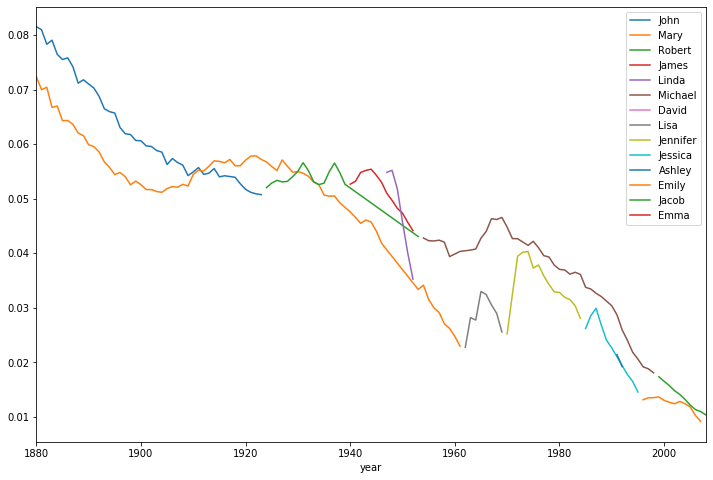

In [85]:
#by_year_sex.set_index(['year'])
def trends(by_year_sex):
    plt.figure(figsize=(12,8))
    ax = plt.subplot(1,1,1)
    for name in by_year_sex['name'].unique():
        by_name = by_year_sex[by_year_sex['name'] == name]
        by_name.plot(ax=ax, x='year', y='prop', label=name )

trends(by_year_sex)

In [78]:
grouped = df.groupby(['year', 'sex'])
top3_by_year_by_sex = grouped['prop'].nlargest(3)
top3 = df.iloc[top3_by_year_by_sex.index.get_level_values(2)]

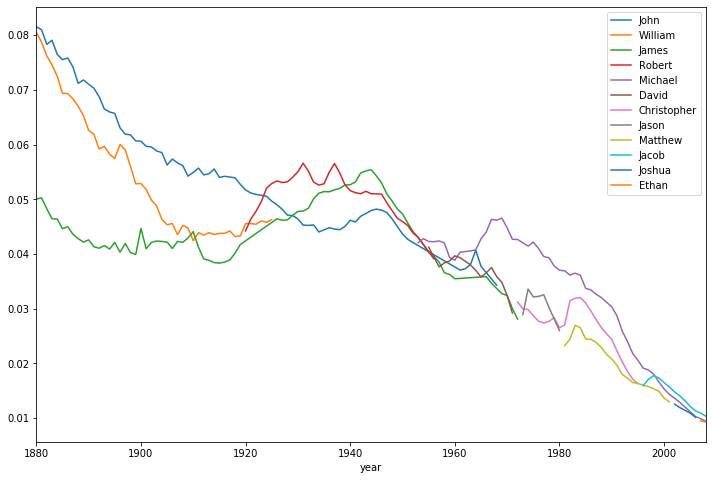

In [86]:
trends(top3[top3['sex']=='boy'])